In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import os
import cv2
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator #generate labels for the images

from tensorflow.keras import layers, models


In [2]:
pip install imgaug

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [3]:
pip install ipyplot

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
import imageio
import imgaug as ia
import imgaug.augmenters as iaa

In [5]:
batch_size = 10
img_height = 200
img_width = 200

In [6]:
IMAGE_SIZE=256
BATCH_SIZE=32

In [7]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  "C:\\Users\\Bhargavi\\OneDrive\\Desktop\\dataset\\tomato train",
  seed=216,
  image_size=(img_height, img_width),
  batch_size=batch_size)



Found 6185 files belonging to 6 classes.


In [8]:
validation_ds = tf.keras.utils.image_dataset_from_directory(
  "C:\\Users\\Bhargavi\\OneDrive\\Desktop\\dataset\\tomato valid" ,
  seed=216,
  image_size=(img_height, img_width),
  batch_size=batch_size)



Found 2649 files belonging to 6 classes.


In [9]:
input_img = tf.keras.preprocessing.image_dataset_from_directory( "C:\\Users\\Bhargavi\\OneDrive\\Desktop\\dataset\\tomato train"
    ,
    shuffle=True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size= BATCH_SIZE,
)

Found 6185 files belonging to 6 classes.


In [10]:
train_datagen = ImageDataGenerator(
      rescale = 1./255,
     horizontal_flip=True,
    vertical_flip= True,
    rotation_range=45,
    zoom_range=0.2
)
train_aug_ds = train_datagen.flow_from_directory(
     "C:\\Users\\Bhargavi\\OneDrive\\Desktop\\dataset\\tomato train",

)

validation_datagen = ImageDataGenerator(
      rescale = 1./255,
     horizontal_flip=True,
    vertical_flip= True,
    rotation_range=45,
    zoom_range=0.2
)

validation_aug_ds = validation_datagen.flow_from_directory(
 "C:\\Users\\Bhargavi\\OneDrive\\Desktop\\dataset\\tomato valid", )

Found 6185 images belonging to 6 classes.
Found 2649 images belonging to 6 classes.


In [11]:
input_img = cv2.imread("C:\\Users\\Bhargavi\\OneDrive\\Desktop\\dataset\\tomato train\\bacterial_spot\BS 1.JPG")

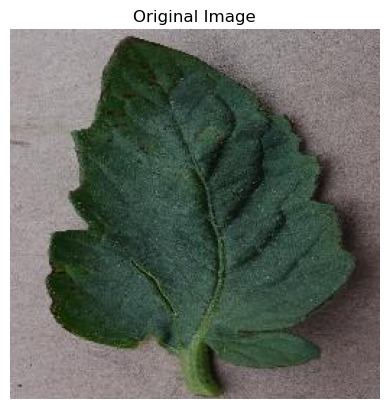

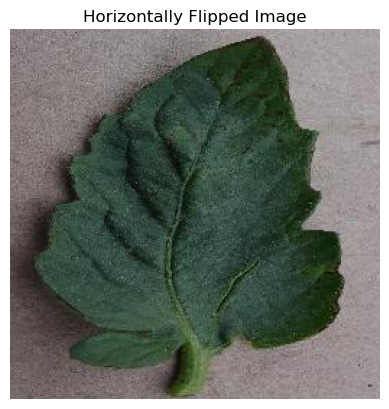

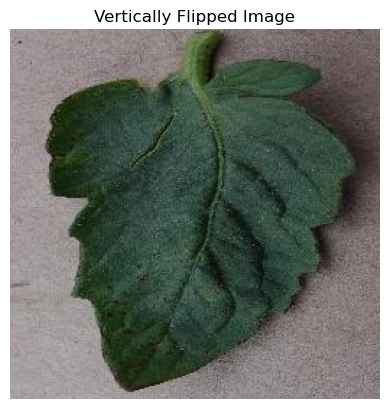

In [12]:
import imgaug.augmenters as iaa
import cv2
import matplotlib.pyplot as plt

input_img = cv2.imread("C:\\Users\\Bhargavi\\OneDrive\\Desktop\\dataset\\tomato train\\bacterial_spot\BS 1.JPG")

if input_img is not None:
   
    plt.imshow(cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')
    plt.show()

    # Horizontal Flip
    hflip = iaa.Fliplr(p=1.0)
    input_hf = hflip.augment_image(input_img)

    # Display the horizontally flipped image
    plt.imshow(cv2.cvtColor(input_hf, cv2.COLOR_BGR2RGB))
    plt.title('Horizontally Flipped Image')
    plt.axis('off')
    plt.show()

    # Vertical Flip
    vflip = iaa.Flipud(p=1.0)
    input_vf = vflip.augment_image(input_img)

    # Display the vertically flipped image
    plt.imshow(cv2.cvtColor(input_vf, cv2.COLOR_BGR2RGB))
    plt.title('Vertically Flipped Image')
    plt.axis('off')
    plt.show()
else:
    print("Image not loaded. Please check the file path.")


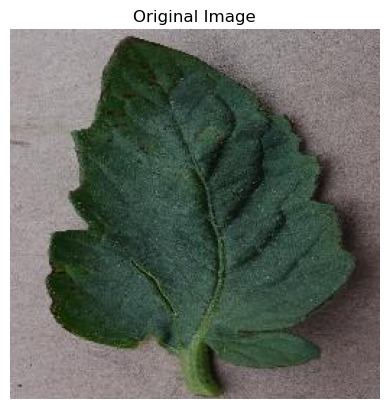

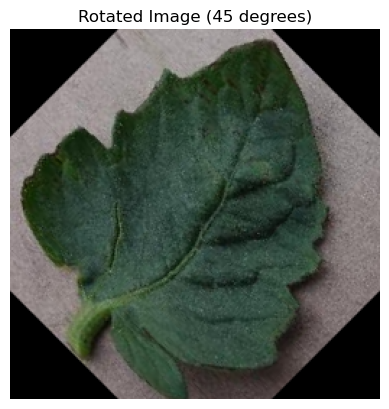

In [13]:
import imgaug.augmenters as iaa
import cv2
import matplotlib.pyplot as plt

input_img = cv2.imread("C:\\Users\\Bhargavi\\OneDrive\\Desktop\\dataset\\tomato train\\bacterial_spot\BS 1.JPG")

if input_img is not None:
    # Display the original image
    plt.imshow(cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')
    plt.show()

    # Define the rotation angle
    rotation_angle = 45  # You can change this angle as needed

    rotate = iaa.Affine(rotate=rotation_angle)
    input_rotated = rotate.augment_image(input_img)

    plt.imshow(cv2.cvtColor(input_rotated, cv2.COLOR_BGR2RGB))
    plt.title(f'Rotated Image ({rotation_angle} degrees)')
    plt.axis('off')
    plt.show()
else:
    print("Image not loaded. Please check the file path.")


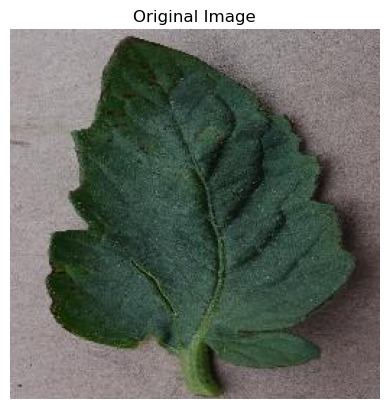

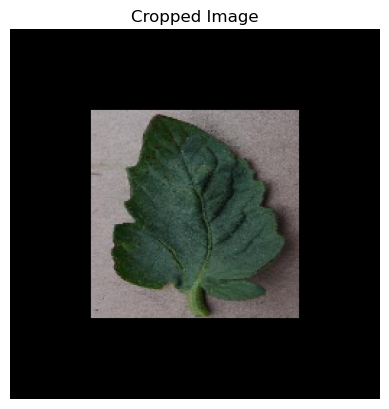

In [14]:
import imgaug.augmenters as iaa
import cv2
import matplotlib.pyplot as plt

input_img = cv2.imread("C:\\Users\\Bhargavi\\OneDrive\\Desktop\\dataset\\tomato train\\bacterial_spot\BS 1.JPG")

if input_img is not None:
    # Display the original image
    plt.imshow(cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')
    plt.show()

    # Define the crop parameters (top, right, bottom, left)
    crop_top = 100
    crop_right = 100
    crop_bottom = 100
    crop_left = 100

    # Apply cropping
    crop = iaa.CropAndPad(px=(crop_top, crop_right, crop_bottom, crop_left))
    input_cropped = crop.augment_image(input_img)

    # Display the cropped image
    plt.imshow(cv2.cvtColor(input_cropped, cv2.COLOR_BGR2RGB))
    plt.title('Cropped Image')
    plt.axis('off')
    plt.show()
else:
    print("Image not loaded. Please check the file path.")


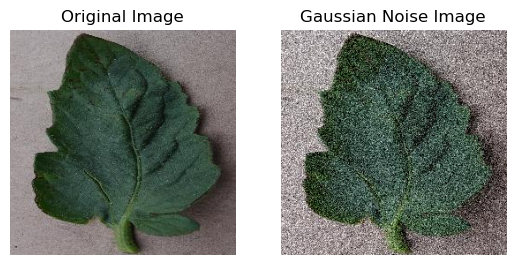

In [15]:
import imgaug.augmenters as iaa
import cv2
import matplotlib.pyplot as plt

# Replace 'path/to/your/image.jpg' with the correct file path to your image
input_img = cv2.imread("C:\\Users\\Bhargavi\\OneDrive\\Desktop\\dataset\\tomato train\\bacterial_spot\BS 1.JPG")

# Check if the image was loaded successfully
if input_img is not None:
    # Display the original image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Apply Gaussian Noise
    noise = iaa.AdditiveGaussianNoise(10, 40)
    input_noise = noise.augment_image(input_img)

    # Display the noisy image
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(input_noise, cv2.COLOR_BGR2RGB))
    plt.title('Gaussian Noise Image')
    plt.axis('off')

    plt.show()
else:
    print("Image not loaded. Please check the file path.")


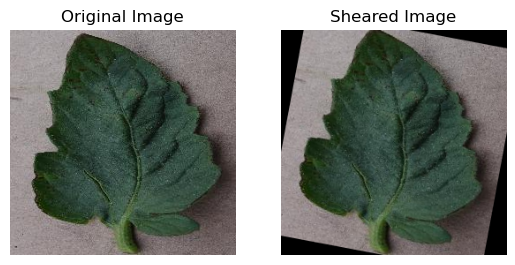

In [16]:
import imgaug.augmenters as iaa
import cv2
import matplotlib.pyplot as plt

# Replace 'path/to/your/image.jpg' with the correct file path to your image
input_img = cv2.imread("C:\\Users\\Bhargavi\\OneDrive\\Desktop\\dataset\\tomato train\\bacterial_spot\BS 1.JPG")

# Check if the image was loaded successfully
if input_img is not None:
    # Display the original image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Apply shearing
    shear = iaa.Affine(shear=(0, 20))  # Adjust the shear parameter as needed
    input_sheared = shear.augment_image(input_img)

    # Display the sheared image
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(input_sheared, cv2.COLOR_BGR2RGB))
    plt.title('Sheared Image')
    plt.axis('off')

    plt.show()
else:
    print("Image not loaded. Please check the file path.")


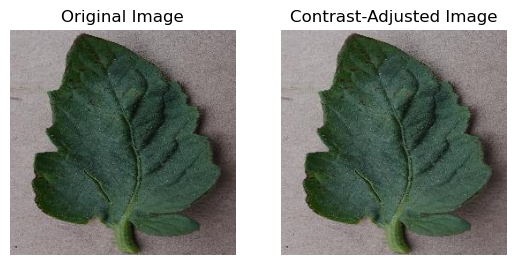

In [17]:
import imgaug.augmenters as iaa
import cv2
import matplotlib.pyplot as plt

# Replace 'path/to/your/image.jpg' with the correct file path to your image
input_img = cv2.imread("C:\\Users\\Bhargavi\\OneDrive\\Desktop\\dataset\\tomato train\\bacterial_spot\BS 1.JPG")

# Check if the image was loaded successfully
if input_img is not None:
    # Display the original image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Apply contrast adjustment (Gamma Contrast)
    gamma_contrast = iaa.GammaContrast(gamma=(0.2, 1.0))  # Adjust the gamma parameter as needed
    input_contrast = gamma_contrast.augment_image(input_img)

    # Display the contrast-adjusted image
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(input_contrast, cv2.COLOR_BGR2RGB))
    plt.title('Contrast-Adjusted Image')
    plt.axis('off')

    plt.show()
else:
    print("Image not loaded. Please check the file path.")


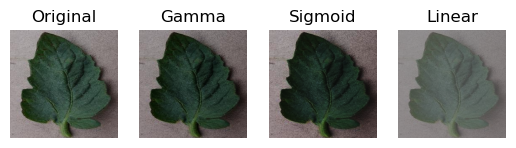

In [18]:
import imgaug.augmenters as iaa
import cv2
import ipyplot
import matplotlib.pyplot as plt

# Replace 'path/to/your/image.jpg' with the correct file path to your image
input_img = cv2.imread("C:\\Users\\Bhargavi\\OneDrive\\Desktop\\dataset\\tomato train\\bacterial_spot\BS 1.JPG")

# Check if the image was loaded successfully
if input_img is not None:
    # Display the original image
    plt.subplot(1, 4, 1)
    plt.imshow(cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB))
    plt.title('Original')
    plt.axis('off')

    # Apply gamma contrast
    contrast = iaa.GammaContrast((0.5, 2.0))
    input_contrast = contrast.augment_image(input_img)

    # Display the gamma contrast image
    plt.subplot(1, 4, 2)
    plt.imshow(cv2.cvtColor(input_contrast, cv2.COLOR_BGR2RGB))
    plt.title('Gamma')
    plt.axis('off')

    # Apply sigmoid contrast
    contrast_sig = iaa.SigmoidContrast(gain=(5, 10), cutoff=(0.4, 0.6))
    sigmoid_contrast = contrast_sig.augment_image(input_img)

    # Display the sigmoid contrast image
    plt.subplot(1, 4, 3)
    plt.imshow(cv2.cvtColor(sigmoid_contrast, cv2.COLOR_BGR2RGB))
    plt.title('Sigmoid')
    plt.axis('off')

    # Apply linear contrast
    contrast_lin = iaa.LinearContrast((0.6, 0.4))
    linear_contrast = contrast_lin.augment_image(input_img)

    # Display the linear contrast image
    plt.subplot(1, 4, 4)
    plt.imshow(cv2.cvtColor(linear_contrast, cv2.COLOR_BGR2RGB))
    plt.title('Linear')
    plt.axis('off')

    plt.show()
else:
    print("Image not loaded. Please check the file path.")


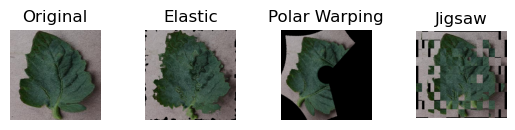

In [19]:
import imgaug.augmenters as iaa
import cv2
import matplotlib.pyplot as plt

# Replace 'path/to/your/image.jpg' with the correct file path to your image
input_img = cv2.imread("C:\\Users\\Bhargavi\\OneDrive\\Desktop\\dataset\\tomato train\\bacterial_spot\BS 1.JPG")

# Check if the image was loaded successfully
if input_img is not None:
    # Display the original image
    plt.subplot(1, 4, 1)
    plt.imshow(cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB))
    plt.title('Original')
    plt.axis('off')

    # Apply elastic transformation
    elastic = iaa.ElasticTransformation(alpha=60.0, sigma=4.0)
    input_elastic = elastic.augment_image(input_img)

    # Display the elastic-transformed image
    plt.subplot(1, 4, 2)
    plt.imshow(cv2.cvtColor(input_elastic, cv2.COLOR_BGR2RGB))
    plt.title('Elastic')
    plt.axis('off')

    # Apply polar warping
    polar = iaa.WithPolarWarping(iaa.CropAndPad(percent=(-0.2, 0.7)))
    input_polar = polar.augment_image(input_img)

    # Display the polar-warped image
    plt.subplot(1, 4, 3)
    plt.imshow(cv2.cvtColor(input_polar, cv2.COLOR_BGR2RGB))
    plt.title('Polar Warping')
    plt.axis('off')

    # Apply jigsaw transformation
    jigsaw = iaa.Jigsaw(nb_rows=10, nb_cols=15, max_steps=(3, 7))
    input_jigsaw = jigsaw.augment_image(input_img)

    # Display the jigsaw-transformed image
    plt.subplot(1, 4, 4)
    plt.imshow(cv2.cvtColor(input_jigsaw, cv2.COLOR_BGR2RGB))
    plt.title('Jigsaw')
    plt.axis('off')

    # Adjust spacing between subplots
    plt.subplots_adjust(wspace=0.5)

    plt.show()
else:
    print("Image not loaded. Please check the file path.")


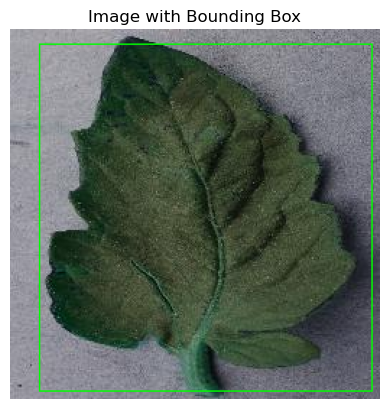

In [20]:
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
import imgaug as ia
import cv2
import matplotlib.pyplot as plt

input_img = cv2.imread("C:\\Users\\Bhargavi\\OneDrive\\Desktop\\dataset\\tomato train\\bacterial_spot\BS 1.JPG")

# Check if the image was loaded successfully
if input_img is not None:
    # Define a bounding box
    bounding_box = BoundingBox(x1=20, x2=250, y1=10, y2=250)

    # Create BoundingBoxesOnImage
    bbs = BoundingBoxesOnImage([bounding_box], shape=input_img.shape)

    # Draw bounding box on the image
    image_with_bb = bbs.draw_on_image(input_img)

    # Display the image with bounding box
    plt.imshow(image_with_bb)
    plt.title('Image with Bounding Box')
    plt.axis('off')
    plt.show()
else:
    print("Image not loaded. Please check the file path.")


In [21]:
train_ds = tf.keras.utils.image_dataset_from_directory(
 "C:\\Users\\Bhargavi\\OneDrive\\Desktop\\dataset\\tomato train",
  seed=6125,
  image_size=(img_height, img_width),
  batch_size=batch_size)



Found 6185 files belonging to 6 classes.


In [22]:
validation_ds = tf.keras.utils.image_dataset_from_directory(
    "C:\\Users\\Bhargavi\\OneDrive\\Desktop\\dataset\\tomato valid",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)



Found 2649 files belonging to 6 classes.


In [23]:
class_names = train_ds.class_names
print(class_names)

['bacterial_spot', 'early blight', 'healthy', 'late blight', 'mosaic virus', 'septoria leaf spot']


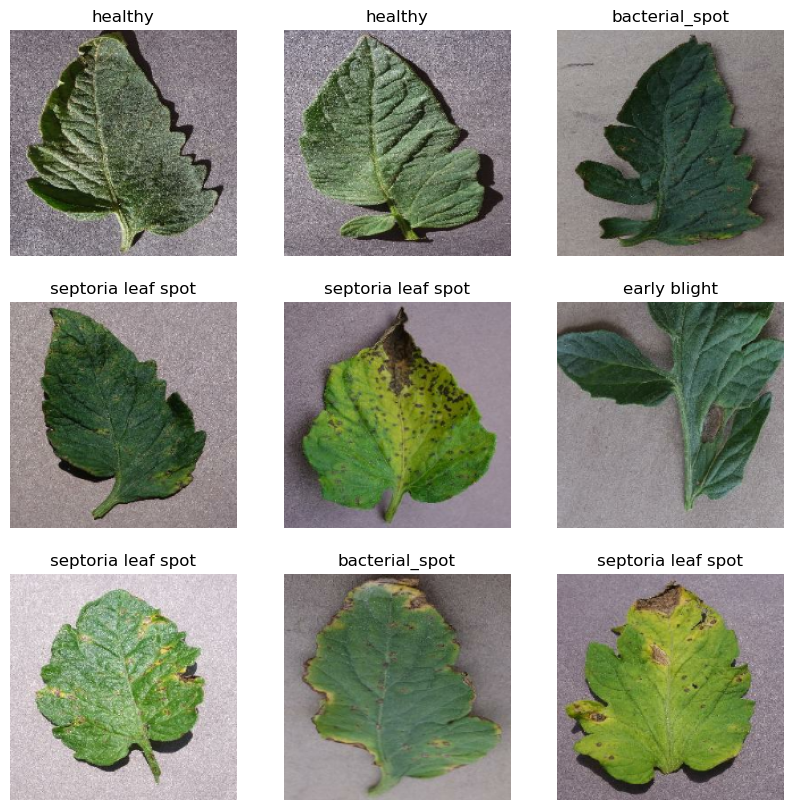

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [25]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(10, 200, 200, 3)
(10,)


In [26]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_ds = validation_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [27]:
normalization_layer = layers.Rescaling(1./255)

In [28]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0006919095 0.8325538


In [29]:
# DATA AUGUMENTATION
from keras.layers import RandomFlip, RandomRotation, RandomZoom
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal_and_vertical'),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.1)
])

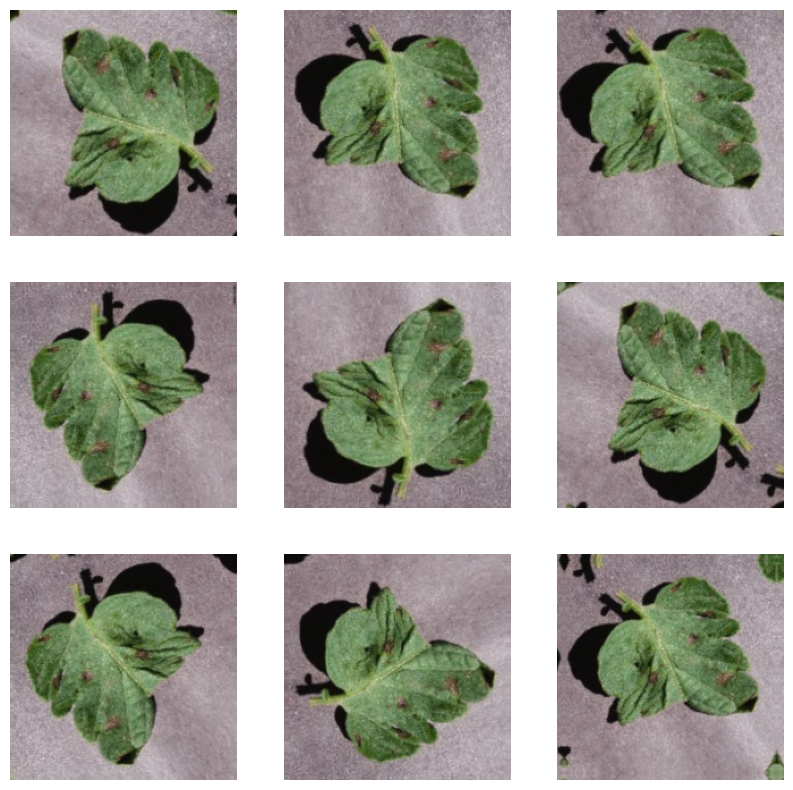

In [30]:
plt.figure(figsize=(10, 10))  #Image after applying data augmentation
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [31]:
#CNN
cnn = models.Sequential()

cnn.add(layers.Conv2D (32, kernel_size = (3,3), activation='relu', input_shape = [224, 224,3])),
cnn.add(layers.MaxPooling2D(pool_size = (2, 2))),

cnn.add(layers.Conv2D(64, (3,3), activation='relu')),
cnn.add(layers. MaxPooling2D((2, 2))),

cnn.add(layers.Conv2D (64, (3,3), activation='relu')),
cnn.add(layers.MaxPooling2D((2, 2))),

cnn.add(layers.Conv2D(64, (3, 3), activation='relu')), 
cnn.add(layers.MaxPooling2D((2, 2))),

cnn.add(layers. Conv2D (64, (3, 3), activation='relu')), 
cnn.add(layers.MaxPooling2D((2, 2))),

cnn.add(layers.Conv2D(64, (3, 3), activation='relu')), 
cnn.add(layers.MaxPooling2D((2, 2))),
cnn.add(layers.Flatten()),

cnn.add(layers.Dense(64,activation='relu'))

cnn.add(layers.Dense(6,activation='softmax'))

In [32]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 64)       

In [33]:
from tensorflow.compat.v1.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)


In [34]:
cnn.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [35]:
#to avoid overfitting
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor = 'val_accuracy', 
                   mode = 'max', 
                   patience = 20, 
                   verbose = 1, 
                   restore_best_weights = True)

In [36]:
from tensorflow.keras.optimizers import Adam

history = cnn.fit(x = train_gen,
                    callbacks = [es], 
                    steps_per_epoch = 4332/32,
                    epochs = 10,
                    validation_steps = 1853/32,
                    validation_data = val_gen)  

NameError: name 'train_gen' is not defined

In [ ]:
acc = history_2.history['accuracy']
val_acc = history_2.history['val_accuracy']

loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
loss, acc = model_2.evaluate(train_ds, verbose = 2)
print("Accuracy", acc)

In [ ]:
#resnet
import datetime

In [ ]:
# Creating a callback function to save model's metrics
def create_tensorboard_callback(dir_name, experiment_name):
    log_dir= dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
     )
    print(f"Saving TensorBoard log files to: {log_dir}")
    return tensorboard_callback

In [ ]:
# Creating model using Resnet50V2 architecture
tl_model = tf.keras.applications.ResNet50V2(include_top=False)
tl_model.trainable = False
inputs = layers.Input(shape=(200, 200, 3), name='input_layer')
x = tl_model(inputs)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(1, activation='relu')(x)
model_3= tf.keras.Model(inputs, outputs)

In [ ]:
model_3.summary()

In [ ]:
model_3.compile(optimizer='adam',
loss = 'categorical_crossentropy',
              metrics=['accuracy'])
epochs=50
history_3 = model_3.fit(
  train_aug_ds,
  validation_data=validation_aug_ds,
  epochs=epochs
)

In [ ]:
acc = history_3.history['accuracy']
val_acc = history_3.history['val_accuracy']

loss = history_3.history['loss']
val_loss = history_3.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
loss, acc = model_3.evaluate(train_ds, verbose = 2)
print("Accuracy", acc)

In [ ]:
#AlexNet
#Instantiation
model_4 = Sequential()

#1st Convolutional Layer
model_4.add(Conv2D(filters=96, input_shape=(200,200,3), kernel_size=(11,11), strides=(4,4), padding='same'))
model_4.add(tf.keras.layers.BatchNormalization())
model_4.add(Activation('relu'))
model_4.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convolutional Layer
model_4.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
model_4.add(tf.keras.layers.BatchNormalization())
model_4.add(Activation('relu'))
model_4.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
model_4.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model_4.add(tf.keras.layers.BatchNormalization())
model_4.add(Activation('relu'))

#4th Convolutional Layer
model_4.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model_4.add(tf.keras.layers.BatchNormalization())
model_4.add(Activation('relu'))

#5th Convolutional Layer
model_4.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
model_4.add(tf.keras.layers.BatchNormalization())
model_4.add(Activation('relu'))

model_4.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
model_4.add(Flatten())
# 1st Fully Connected Layer
model_4.add(Dense(4096, input_shape=(200,200,3,)))
model_4.add(tf.keras.layers.BatchNormalization())
model_4.add(Activation('relu'))
# Add Dropout to prevent overfitting
model_4.add(Dropout(0.4))

#2nd Fully Connected Layer
model_4.add(Dense(4096))
model_4.add(tf.keras.layers.BatchNormalization())
model_4.add(Activation('relu'))
#Add Dropout
model_4.add(Dropout(0.4))

#Output Layer
model_4.add(Dense(1))
model_4.add(tf.keras.layers.BatchNormalization())
model_4.add(Activation('softmax'))

#Model Summary
model_4.summary()

In [ ]:
model_4.compile(optimizer='adam',
loss = 'categorical_crossentropy',
              metrics=['accuracy'])
epochs=50
history_4 = model_3.fit(
  train_aug_ds,
  validation_data=validation_aug_ds,
  epochs=epochs
)

In [ ]:
acc = history_3.history['accuracy']
val_acc = history_3.history['val_accuracy']

loss = history_3.history['loss']
val_loss = history_3.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
loss, acc = model_4.evaluate(train_ds, verbose = 2)
print("Accuracy", acc)

In [ ]:
# Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(200,200,3))
base_model.trainable = False ## Not trainable weights

In [ ]:
flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(1, activation='softmax')


model_5 = models.Sequential([
    
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [ ]:
model_5.compile(optimizer='adam',
loss = 'categorical_crossentropy',
              metrics=['accuracy'])
epochs=50
history_5 = model_3.fit(
  train_aug_ds,
  validation_data=validation_aug_ds,
  epochs=epochs
)

In [ ]:
acc = history_5.history['accuracy']
val_acc = history_5.history['val_accuracy']

loss = history_5.history['loss']
val_loss = history_5.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
loss, acc = model_4.evaluate(train_ds, verbose = 2)
print("Accuracy", acc)